In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../input/uber-fares-dataset/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df.isna().any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude     True
dropoff_latitude      True
passenger_count      False
dtype: bool

In [4]:
df.shape

(200000, 8)

In [5]:
df = df.dropna()

In [6]:
df.isna().any()


key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

In [7]:
df.shape

(199999, 8)

In [8]:
df = df.loc[df['pickup_longitude'] >= -180]
df = df.loc[df['pickup_longitude'] <= 180]
df = df.loc[df['dropoff_longitude'] >= -180]
df = df.loc[df['dropoff_longitude'] <= 180]
df = df.loc[df['pickup_latitude'] >= -90]
df = df.loc[df['pickup_latitude'] <= 90]
df = df.loc[df['dropoff_latitude'] >= -90]
df = df.loc[df['dropoff_latitude'] <= 90]

In [9]:
df.shape

(199987, 8)

In [10]:
def harvesine_dist(latitude1, longitude1, latitude2, longitude2):
    lat1, long1, lat2, long2 = map(np.radians, [latitude1, longitude1, latitude2, longitude2])
    dist_lat = lat2-lat1
    dist_long = long2-long1
    a = np.sin(dist_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    
    return c

In [11]:
df['Distance'] = harvesine_dist(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

In [12]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


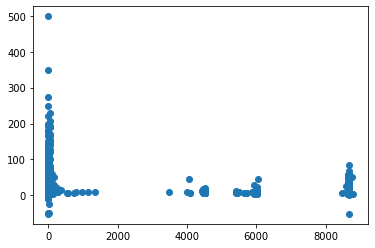

In [13]:
plt.scatter(df['Distance'], df['fare_amount'])

In [14]:
df = df.loc[df['fare_amount']>0]
df = df.loc[df['Distance']>0]
df = df.loc[df['Distance']<75]
df.shape

(193857, 9)

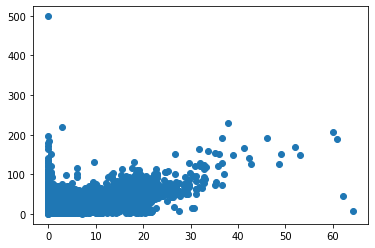

In [15]:
plt.scatter(df['Distance'], df['fare_amount'])

<AxesSubplot:>

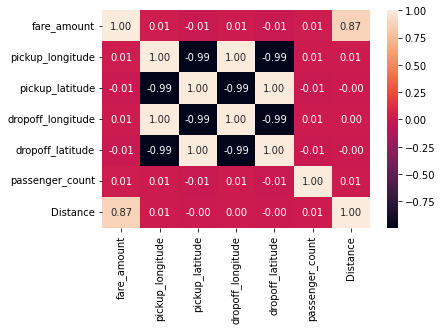

In [16]:
sns.heatmap(df.corr(),annot=True, fmt='.2f')

In [17]:
x = df['Distance'].values.reshape(-1,1)
y = df['fare_amount'].values.reshape(-1,1)

In [18]:
ss = StandardScaler()
std_x = ss.fit_transform(x)
std_y = ss.fit_transform(y)

In [19]:
train_x, test_x, train_y, test_y = train_test_split(std_x, std_y, test_size=0.2, random_state=42)


In [20]:
lreg = LinearRegression()
rfreg = RandomForestRegressor()

In [21]:
lreg.fit(train_x, train_y)
rfreg.fit(train_x, train_y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [22]:
lreg_pred = lreg.predict(test_x)
rfreg_pred = rfreg.predict(test_x)


In [23]:
print("Coeff of Linear Regression ", lreg.coef_, "and Intercept is ", lreg.intercept_)

Coeff of Linear Regression  [[0.8694432]] and Intercept is  [-0.00038648]


In [24]:
print("For Linear Regression")
print("MAE is ", mean_absolute_error(test_y, lreg_pred))
print("MSE is ", mean_squared_error(test_y, lreg_pred))
print("RMSE is ", np.sqrt(mean_squared_error(test_y, lreg_pred)),'\n')

print("For Random Forest Regression")
print("MAE is ", mean_absolute_error(test_y, rfreg_pred))
print("MSE is ", mean_squared_error(test_y, rfreg_pred))
print("RMSE is ", np.sqrt(mean_squared_error(test_y, rfreg_pred)))

For Linear Regression
MAE is  0.24242896988112872
MSE is  0.2379950077864864
RMSE is  0.48784732015917276 

For Random Forest Regression
MAE is  0.2914078606691446
MSE is  0.3098858087164364
RMSE is  0.5566738800378875


In [25]:
res = pd.DataFrame()
res[['Actual']] = test_y
res['Linear_Predicted'] = lreg_pred
res['Random_Forest_Predicted'] = rfreg_pred

res.head()

,Actual,Linear_Predicted,Random_Forest_Predicted
0,0.169871,-0.229004,-0.240147
1,0.159595,0.631415,0.568586
2,-0.785811,-0.652519,-0.718605
3,1.403010,0.926525,0.671759
4,4.725291,3.726628,3.988008
